In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cbook as cbook

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

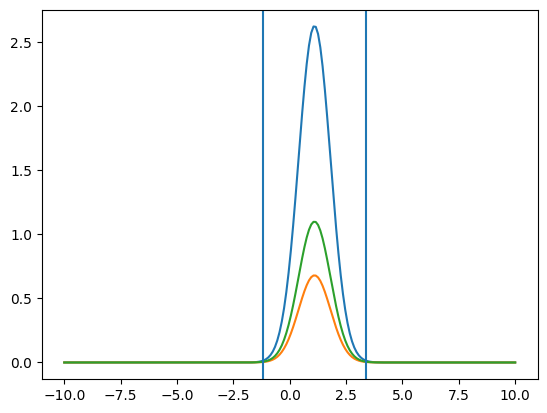

*Extracting Pieces for TH2*
Available Functions:
	Num_Xbins(TH2_) returns number of X bins for a TH2
	Num_Ybins(TH2_) returns number of Y bins for a TH2
	XEdges_2d(TH2_) returns edges of x bins for a TH2
	YEdges_2d(TH2_) returns edges of y bins for a TH2
	Center_Xbins(TH2_) returns center values for x bins for a TH2
	Center_Ybins(TH2_) returns center value for y bins for a TH2
	XY_Values(TH2_) returns a 2D np.array for z values arranged [x][y] for a TH2
	YX_Values(TH2_) returns a 2D np.array for z values arranged [y][x] for a TH2
Enjoy using TH2s

0.014000000000000012
You have access to information regarding all bin numbers, bin maxes, bin mins
Each goes _VAR_max_ min, bins, res, etc. 
All the names of them as well as edges.
Q2_Bin_Name[ 5 ]
W_Bin_Name[ 29 ]
MM1_Bin_Name[ 14 ]
MM2_Bin_Name[ 14 ]
theta_Bin_Name[ 10 ]
alpha_Bin_Name[ 10 ]
phi_Bin_Name[ 10 ]
_var_set_name_ [i]
_Xij_name_[i][j]
Also _mm1_name_ etc. for all Xijs
def Q2_Corr(Q2bin_) corrects the cross section for simulation 

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

In [3]:
#date="06-13-2022"
exp_date="08-18-2024"
sim_date="08-22-2024"
par="ele"
run="e16"
exp_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+exp_date
sim_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+sim_date
#root_file=dir+"/exp_mm_"+par+"_e16_"+date+"_"+SLURM_ID+".root"
root_file_exp=exp_dir+"/exp_"+run+"_clas6_kin_eff_"+par+"_"+exp_date+".root"
root_file_sim=sim_dir+"/sim_"+run+"_clas6_kin_eff_"+par+"_"+sim_date+".root"
xfile=uproot3.open(root_file_exp)
rfile=uproot3.open(root_file_sim)

In [4]:
good_sc_paddles = [[True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,False,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,False,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,False,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,False],
                   [True,True,False,True,True,False],
                   [True,True,False,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,True,True],
                   [True,True,True,True,False,True],
                   [True,True,False,True,False,True],
                   [True,True,True,True,True,True],
                   [True,True,False,True,True,False],
                   [False,False,False,True,True,True],
                   [True,True,False,True,True,True],
                   [True,True,False,True,False,True]]

In [5]:
sel = 1
pid_cut = ["pid","event"]
top = ["mnone","mall"]



layer1 = "Kinematic Efficiency"
layer2 = "kinematic_eff_"+par
layer3 = layer2+"_"+pid_cut[sel]
#layer4 = layer3+"_"+top[sel]
#layer5 = layer4+"_cut"
#print(xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys())

if sel ==1:
    layer4 = layer3+"_"+top[sel]
    layer5 = layer4+"_cut"
    xhist = [xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5][i] for i in xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys()]
    rhist = [rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5][i] for i in rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys()]
else:
    xhist = [xfile[layer1+"/"+layer2+"/"+layer3][i] for i in xfile[layer1+"/"+layer2+"/"+layer3].keys()]
    rhist = [rfile[layer1+"/"+layer2+"/"+layer3][i] in range(len(rfile[layer1+"/"+layer2+"/"+layer3].keys()))]



In [6]:
l1 = "Kinematic Efficiency by Segment"
l2 = "Kinematic Efficiency "+par
l3 = ["Kinematic Efficiency "+par+" Sector:"+str(sec+1) for sec in range(6)]
l4 = [["Kinematic_Efficiency_"+par+"_sec"+str(sec+1)+"_Seg:"+str(pad+1) for pad in range(48)] for sec in range(6)]


xhist2 = [[xfile[l1][l2][l3[sec]][l4[sec][pad]] for pad in range(48)] for sec in range(6)]
rhist2 = [[rfile[l1][l2][l3[sec]][l4[sec][pad]] for pad in range(48)] for sec in range(6)]



In [7]:
cut_cols = ['b','g','r']
cut_name= ["tight","mid","loose"]
data_cols = ['m',"c",'y']

Particle=''
Theta = ''
Momentum = ''
if par == "pro":
    Particle = "Proton"
    Momentum='$p_{P}$'
    Theta = "$\u03B8_{P}$"
elif par == "pip":
    Particle = "$\u03C0^+$"
    Momentum='$p_{\u03C0^+}$'
    Theta = "$\u03B8_{\u03C0^+}$"
elif par == "pim":
    Particle = "$\u03C0^-$"
    Momentum='$p_{\u03C0^-}$'
    Theta = "$\u03B8_{\u03C0^-}$"
elif par == "ele":
    Particle = "Electron"
    #Momentum=r'$p_{e}$'
    #Theta = r'$\u03B8_{e}$'
    Momentum='$p_{e}$'
    Theta = '$\u03B8_{e}$'


xname = Momentum+" (GeV)"
yname=Theta+" (degrees)"
print(xname)
print(yname)

$p_{e}$ (GeV)
$θ_{e}$ (degrees)


In [8]:
#Extracting X and Y bins
#X and Y binning is the same for all sectors
xbins=Center_Xbins(xhist[0])
ybins=Center_Ybins(xhist[0])
#Extracting Zvals for 2d histograms
exp_zvals_xy=[XY_Values(xhist[sec]) for sec in range(6)]
exp_zvals_yx=[YX_Values(xhist[sec]) for sec in range(6)]
sim_zvals_xy=[XY_Values(rhist[sec]) for sec in range(6)] 
sim_zvals_yx=[YX_Values(rhist[sec]) for sec in range(6)]

exp_zvals2_xy=[[XY_Values(xhist2[sec][pad]) for pad in range(48)] for sec in range(6)]
exp_zvals2_yx=[[YX_Values(xhist2[sec][pad]) for pad in range(48)] for sec in range(6)]
sim_zvals2_xy=[[XY_Values(rhist2[sec][pad]) for pad in range(48)] for sec in range(6)] 
sim_zvals2_yx=[[YX_Values(rhist2[sec][pad]) for pad in range(48)] for sec in range(6)]

In [9]:
#Determining Cell Merging 
xmerge=1
ymerge=1

#Merge -> No Zeros
x = Merge_Bins(xbins,xmerge)
y = Merge_Bins(ybins,ymerge)

xedges = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge)
yedges = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge)
exp_z_xy=[Merge_Z(exp_zvals_xy[sec],xmerge,ymerge) for sec in range(6)]
exp_z_yx=[Merge_Z(exp_zvals_yx[sec],ymerge,xmerge) for sec in range(6)]
sim_z_xy=[Merge_Z(sim_zvals_xy[sec],xmerge,ymerge) for sec in range(6)]
sim_z_yx=[Merge_Z(sim_zvals_yx[sec],ymerge,xmerge) for sec in range(6)]

exp_z2_xy=[[Merge_Z(exp_zvals2_xy[sec][pad],xmerge,ymerge) for pad in range(48)] for sec in range(6)]
exp_z2_yx=[[Merge_Z(exp_zvals2_yx[sec][pad],ymerge,xmerge) for pad in range(48)] for sec in range(6)]
sim_z2_xy=[[Merge_Z(sim_zvals2_xy[sec][pad],xmerge,ymerge) for pad in range(48)] for sec in range(6)]
sim_z2_yx=[[Merge_Z(sim_zvals2_yx[sec][pad],ymerge,xmerge) for pad in range(48)] for sec in range(6)]

# exp_fit_x = [[Remove_Zeros_X(y,exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
# exp_fit_y = [[Remove_Zeros_Y(exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]

# sim_fit_x = [[Remove_Zeros_X(y,sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
# sim_fit_y = [[Remove_Zeros_Y(sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]


In [10]:
xr_z_xy = np.zeros((6,len(x),len(y)))
xr_z_yx = np.zeros((6,len(y),len(x)))
rx_z_xy = np.zeros((6,len(x),len(y)))
rx_z_yx = np.zeros((6,len(y),len(x)))

xr_z2_xy = np.zeros((6,48,len(x),len(y)))
xr_z2_yx = np.zeros((6,48,len(y),len(x)))
rx_z2_xy = np.zeros((6,48,len(x),len(y)))
rx_z2_yx = np.zeros((6,48,len(y),len(x)))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if sim_z_xy[sec][xbin][ybin] >0.0:
                xr_z_xy[sec][xbin][ybin] = exp_z_xy[sec][xbin][ybin]/sim_z_xy[sec][xbin][ybin]
                xr_z_yx[sec][ybin][xbin] = exp_z_yx[sec][ybin][xbin]/sim_z_yx[sec][ybin][xbin]
            if exp_z_xy[sec][xbin][ybin] >0.0:
                rx_z_xy[sec][xbin][ybin] = sim_z_xy[sec][xbin][ybin]/exp_z_xy[sec][xbin][ybin]
                rx_z_yx[sec][ybin][xbin] = sim_z_yx[sec][ybin][xbin]/exp_z_yx[sec][ybin][xbin]
            for pad in range(48):
                if sim_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xr_z2_xy[sec][pad][xbin][ybin] = exp_z2_xy[sec][pad][xbin][ybin]/sim_z2_xy[sec][pad][xbin][ybin]
                    xr_z2_yx[sec][pad][ybin][xbin] = exp_z2_yx[sec][pad][ybin][xbin]/sim_z2_yx[sec][pad][ybin][xbin]
                if exp_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rx_z2_xy[sec][pad][xbin][ybin] = sim_z2_xy[sec][pad][xbin][ybin]/exp_z2_xy[sec][pad][xbin][ybin]
                    rx_z2_yx[sec][pad][ybin][xbin] = sim_z2_yx[sec][pad][ybin][xbin]/exp_z2_yx[sec][pad][ybin][xbin]
                



In [11]:
xs_z_xy = np.zeros((6,len(x),len(y)))
xs_z_yx = np.zeros((6,len(y),len(x)))
rs_z_xy = np.zeros((6,len(x),len(y)))
rs_z_yx = np.zeros((6,len(y),len(x)))

xs_z2_xy = np.zeros((6,48,len(x),len(y)))
xs_z2_yx = np.zeros((6,48,len(y),len(x)))
rs_z2_xy = np.zeros((6,48,len(x),len(y)))
rs_z2_yx = np.zeros((6,48,len(y),len(x)))

xrs_z_xy = np.zeros((6,len(x),len(y)))
xrs_z_yx = np.zeros((6,len(y),len(x)))
rxs_z_xy = np.zeros((6,len(x),len(y)))
rxs_z_yx = np.zeros((6,len(y),len(x)))

xrs_z2_xy = np.zeros((6,48,len(x),len(y)))
xrs_z2_yx = np.zeros((6,48,len(y),len(x)))
rxs_z2_xy = np.zeros((6,48,len(x),len(y)))
rxs_z2_yx = np.zeros((6,48,len(y),len(x)))

xxs_z_xy = np.zeros((6,len(x),len(y)))
xxs_z_yx = np.zeros((6,len(y),len(x)))
rrs_z_xy = np.zeros((6,len(x),len(y)))
rrs_z_yx = np.zeros((6,len(y),len(x)))

xxs_z2_xy = np.zeros((6,48,len(x),len(y)))
xxs_z2_yx = np.zeros((6,48,len(y),len(x)))
rrs_z2_xy = np.zeros((6,48,len(x),len(y)))
rrs_z2_yx = np.zeros((6,48,len(y),len(x)))

xsx_z_xy = np.zeros((6,len(x),len(y)))
xsx_z_yx = np.zeros((6,len(y),len(x)))
rsr_z_xy = np.zeros((6,len(x),len(y)))
rsr_z_yx = np.zeros((6,len(y),len(x)))

xsx_z2_xy = np.zeros((6,48,len(x),len(y)))
xsx_z2_yx = np.zeros((6,48,len(y),len(x)))
rsr_z2_xy = np.zeros((6,48,len(x),len(y)))
rsr_z2_yx = np.zeros((6,48,len(y),len(x)))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            for pad in range(48):
                if good_sc_paddles[pad][sec]:
                    xs_z_xy[sec][xbin][ybin] += exp_z2_xy[sec][pad][xbin][ybin]
                    rs_z_xy[sec][xbin][ybin] += sim_z2_xy[sec][pad][xbin][ybin]
                    xs_z_yx[sec][ybin][xbin] += exp_z2_yx[sec][pad][ybin][xbin]
                    rs_z_yx[sec][ybin][xbin] += sim_z2_yx[sec][pad][ybin][xbin]
                    xs_z2_xy[sec][pad][xbin][ybin] += exp_z2_xy[sec][pad][xbin][ybin]
                    rs_z2_xy[sec][pad][xbin][ybin] += sim_z2_xy[sec][pad][xbin][ybin]
                    xs_z2_yx[sec][pad][ybin][xbin] += exp_z2_yx[sec][pad][ybin][xbin]
                    rs_z2_yx[sec][pad][ybin][xbin] += sim_z2_yx[sec][pad][ybin][xbin]
                    
for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if rs_z_xy[sec][xbin][ybin] >0.0:
                xrs_z_xy[sec][xbin][ybin] = xs_z_xy[sec][xbin][ybin]/rs_z_xy[sec][xbin][ybin]
                xrs_z_yx[sec][ybin][xbin] = xs_z_yx[sec][ybin][xbin]/rs_z_yx[sec][ybin][xbin]
                rrs_z_yx[sec][ybin][xbin] = sim_z_yx[sec][ybin][xbin]/rs_z_yx[sec][ybin][xbin]
                rrs_z_xy[sec][xbin][ybin] = sim_z_xy[sec][xbin][ybin]/rs_z_xy[sec][xbin][ybin]
            if xs_z_xy[sec][xbin][ybin] >0.0:
                rxs_z_xy[sec][xbin][ybin] = rs_z_xy[sec][xbin][ybin]/xs_z_xy[sec][xbin][ybin]
                rxs_z_yx[sec][ybin][xbin] = rs_z_yx[sec][ybin][xbin]/xs_z_yx[sec][ybin][xbin]
                xxs_z_yx[sec][ybin][xbin] = exp_z_yx[sec][ybin][xbin]/xs_z_yx[sec][ybin][xbin]
                xxs_z_xy[sec][xbin][ybin] = exp_z_xy[sec][xbin][ybin]/xs_z_xy[sec][xbin][ybin]
            if exp_z_xy[sec][xbin][ybin] >0.0:
                xsx_z_yx[sec][ybin][xbin] = xs_z_yx[sec][ybin][xbin]/exp_z_yx[sec][ybin][xbin]
                xsx_z_xy[sec][xbin][ybin] = xs_z_xy[sec][xbin][ybin]/exp_z_xy[sec][xbin][ybin]
            if sim_z_xy[sec][xbin][ybin] >0.0:
                rsr_z_yx[sec][ybin][xbin] = rs_z_yx[sec][ybin][xbin]/sim_z_yx[sec][ybin][xbin]
                rsr_z_xy[sec][xbin][ybin] = rs_z_xy[sec][xbin][ybin]/sim_z_xy[sec][xbin][ybin]
            for pad in range(48):
                if rs_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xr_z2_xy[sec][pad][xbin][ybin] = xs_z2_xy[sec][pad][xbin][ybin]/rs_z2_xy[sec][pad][xbin][ybin]
                    xr_z2_yx[sec][pad][ybin][xbin] = xs_z2_yx[sec][pad][ybin][xbin]/rs_z2_yx[sec][pad][ybin][xbin]
                    rrs_z2_xy[sec][pad][xbin][ybin] = sim_z2_xy[sec][pad][xbin][ybin]/rs_z2_xy[sec][pad][xbin][ybin]
                    rrs_z2_yx[sec][pad][ybin][xbin] = sim_z2_yx[sec][pad][ybin][xbin]/rs_z2_yx[sec][pad][ybin][xbin]
                if xs_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rx_z2_xy[sec][pad][xbin][ybin] = rs_z2_xy[sec][pad][xbin][ybin]/xs_z2_xy[sec][pad][xbin][ybin]
                    rx_z2_yx[sec][pad][ybin][xbin] = rs_z2_yx[sec][pad][ybin][xbin]/xs_z2_yx[sec][pad][ybin][xbin]
                    xxs_z2_xy[sec][pad][xbin][ybin] = exp_z2_xy[sec][pad][xbin][ybin]/xs_z2_xy[sec][pad][xbin][ybin]
                    xxs_z2_yx[sec][pad][ybin][xbin] = exp_z2_yx[sec][pad][ybin][xbin]/xs_z2_yx[sec][pad][ybin][xbin]
                if exp_z2_xy[sec][pad][xbin][ybin] >0.0:
                    xsx_z2_xy[sec][pad][xbin][ybin] = xs_z2_xy[sec][pad][xbin][ybin]/exp_z2_xy[sec][pad][xbin][ybin]
                    xsx_z2_yx[sec][pad][ybin][xbin] = xs_z2_yx[sec][pad][ybin][xbin]/exp_z2_yx[sec][pad][ybin][xbin]
                if sim_z2_xy[sec][pad][xbin][ybin] >0.0:
                    rsr_z2_xy[sec][pad][xbin][ybin] = rs_z2_xy[sec][pad][xbin][ybin]/sim_z2_xy[sec][pad][xbin][ybin]
                    rsr_z2_yx[sec][pad][ybin][xbin] = rs_z2_yx[sec][pad][ybin][xbin]/sim_z2_yx[sec][pad][ybin][xbin]
                

In [12]:
def min_z(zvals_):
    m = 0
    for i in range(len(zvals_)):
        for j in range(len(zvals_[0])):
            if zvals_[i][j]>0.0:
                if m == 0:
                    m = zvals_[i][j]
                elif m > zvals_[i][j]:
                    m = zvals_[i][j]
    return m

In [13]:
min_z_xs = np.zeros(6)
min_z2_xs = np.zeros((6,48))

max_z_xs = np.zeros(6)
max_z2_xs = np.zeros((6,48))

min_z_rs = np.zeros(6)
min_z2_rs = np.zeros((6,48))

max_z_rs = np.zeros(6)
max_z2_rs = np.zeros((6,48))

min_z_xrs = np.zeros(6)
min_z2_xrs = np.zeros((6,48))

max_z_xrs = np.zeros(6)
max_z2_xrs = np.zeros((6,48))

min_z_rxs = np.zeros(6)
min_z2_rxs = np.zeros((6,48))

max_z_rxs = np.zeros(6)
max_z2_rxs = np.zeros((6,48))

for sec in range(6):
    for xbin in range(len(x)):
        for ybin in range(len(y)):
            if xs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_xs[sec] < xs_z_xy[sec][xbin][ybin]:
                    max_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
                if min_z_xs[sec] == 0:
                    min_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
                elif min_z_xs[sec] > xs_z_xy[sec][xbin][ybin]:
                    min_z_xs[sec] = xs_z_xy[sec][xbin][ybin]
            if rs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_rs[sec] < rs_z_xy[sec][xbin][ybin]:
                    max_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
                if min_z_rs[sec] == 0:
                    min_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
                elif min_z_rs[sec] > rs_z_xy[sec][xbin][ybin]:
                    min_z_rs[sec] = rs_z_xy[sec][xbin][ybin]
            if xrs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_xrs[sec] < xrs_z_xy[sec][xbin][ybin]:
                    max_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
                if min_z_xrs[sec] == 0:
                    min_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
                elif min_z_xrs[sec] > xrs_z_xy[sec][xbin][ybin]:
                    min_z_xrs[sec] = xrs_z_xy[sec][xbin][ybin]
            if rxs_z_xy[sec][xbin][ybin] >0.0:
                if max_z_rxs[sec] < rxs_z_xy[sec][xbin][ybin]:
                    max_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]
                if min_z_rxs[sec] == 0:
                    min_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]
                elif min_z_rxs[sec] > rxs_z_xy[sec][xbin][ybin]:
                    min_z_rxs[sec] = rxs_z_xy[sec][xbin][ybin]
                    
                    

In [14]:
print(min_z_rs)

[1.85896101e-05 1.65869005e-05 1.18146791e-05 1.21668575e-06
 4.04172060e-05 1.57235190e-05]


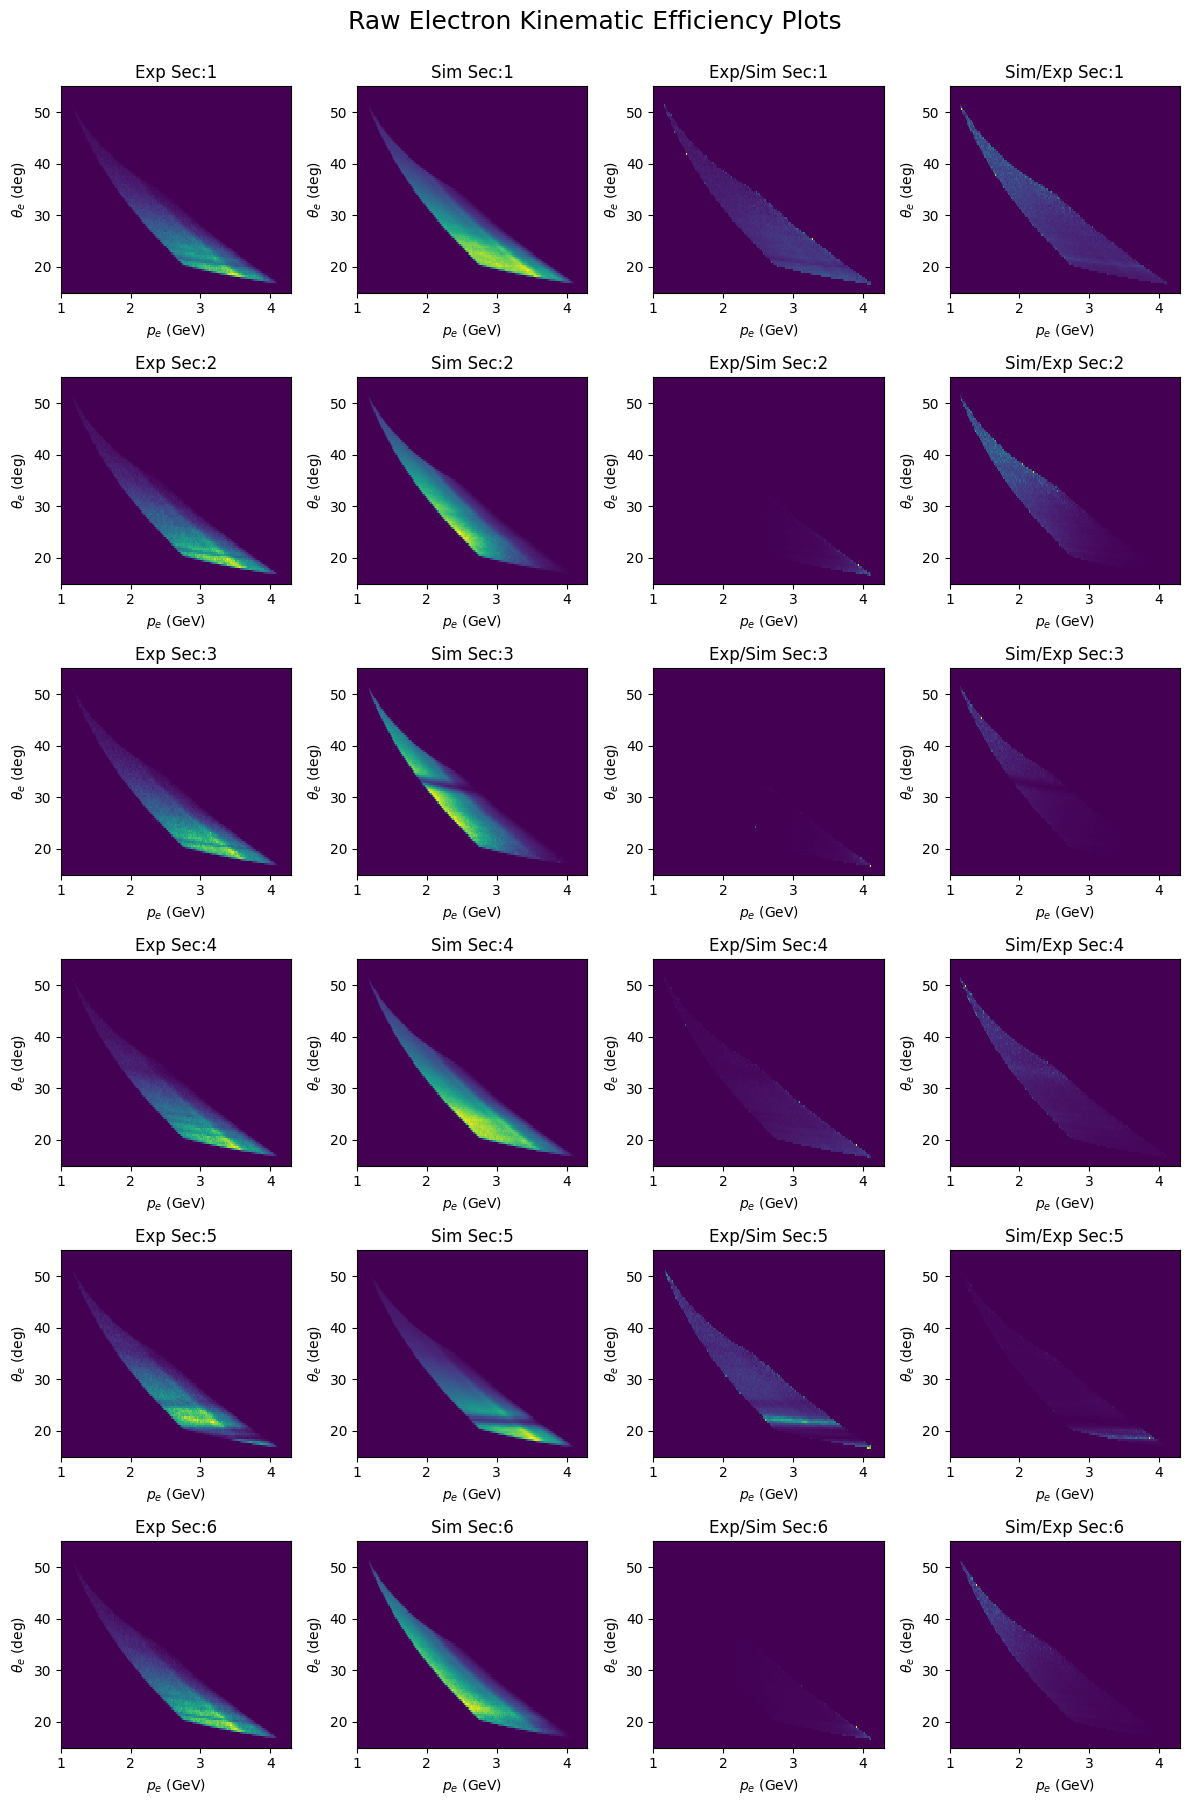

In [15]:

figure, axis = plt.subplots(6,4)
figure.set_size_inches(12,18)
figure.suptitle("Raw {} Kinematic Efficiency Plots".format(Particle),x=0.5,y=1.0,size=18)
for sec in range(6):
    axis[sec,0].pcolormesh(x,y,exp_z_yx[sec])
    axis[sec,0].set_title("Exp Sec:{}".format(sec+1))
    axis[sec,0].set_xlim((1,4.3))
    axis[sec,0].set_ylim((15,55))
    axis[sec,0].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,0].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,0].colorbar(pcolormesh(x,y,xs_z_yx[sec]))
    axis[sec,1].pcolormesh(x,y,sim_z_yx[sec])
    axis[sec,1].set_title("Sim Sec:{}".format(sec+1))
    axis[sec,1].set_xlim((1,4.3))
    axis[sec,1].set_ylim((15,55))
    axis[sec,1].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,1].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,1].colorbar()
    axis[sec,2].pcolormesh(x,y,xr_z_yx[sec])
    axis[sec,2].set_title("Exp/Sim Sec:{}".format(sec+1))
    axis[sec,2].set_xlim((1,4.3))
    axis[sec,2].set_ylim((15,55))
    axis[sec,2].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,2].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,2].colorbar()
    axis[sec,3].pcolormesh(x,y,rx_z_yx[sec])
    axis[sec,3].set_title("Sim/Exp Sec:{}".format(sec+1))
    axis[sec,3].set_xlim((1,4.3))
    axis[sec,3].set_ylim((15,55))
    axis[sec,3].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,3].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,3].colorbar()
#plt.colorbar()
plt.tight_layout()
plt.show()

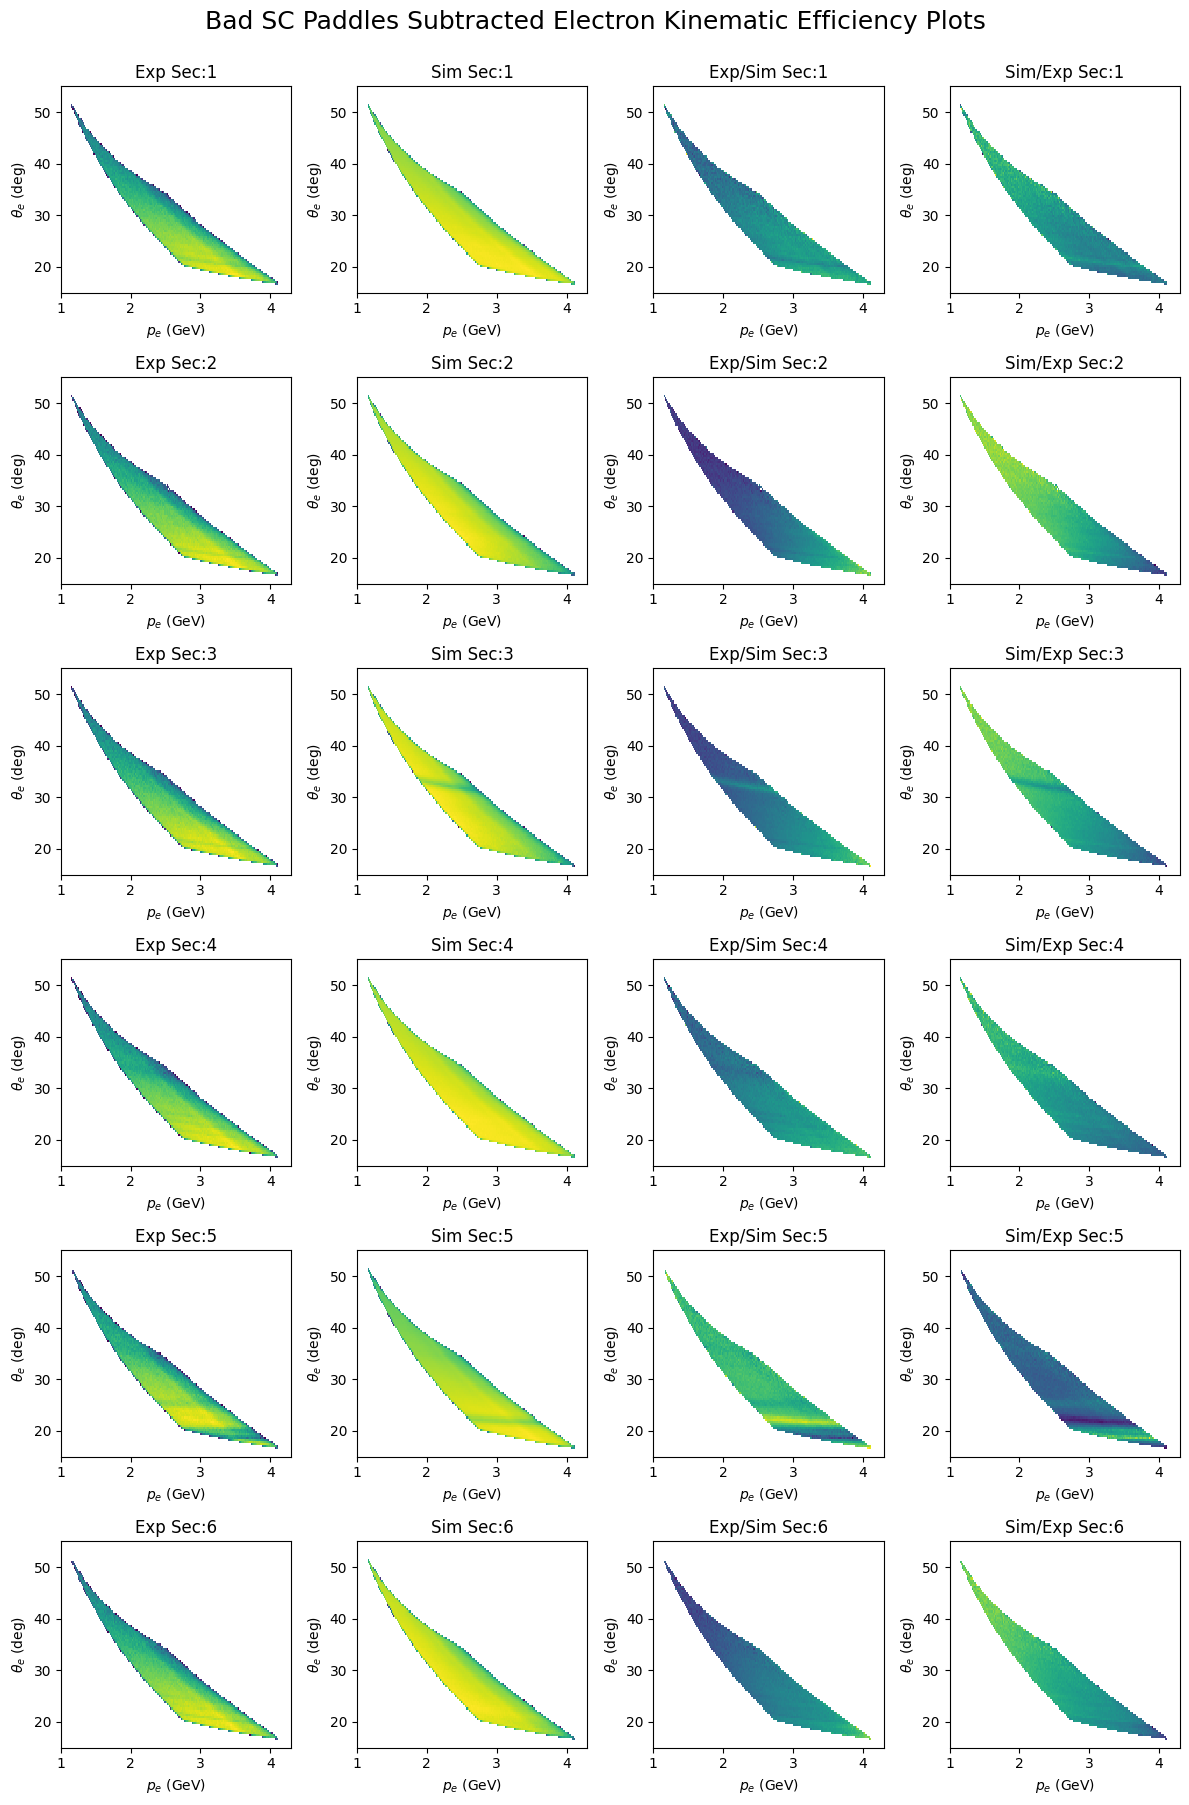

In [16]:
figure, axis = plt.subplots(6,4)
figure.set_size_inches(12,18)
figure.suptitle("Bad SC Paddles Subtracted {} Kinematic Efficiency Plots".format(Particle),x=0.5,y=1.0,size=18)
for sec in range(6):
    axis[sec,0].pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xs[sec],vmax=xs_z_yx[sec].max()))
    axis[sec,0].set_title("Exp Sec:{}".format(sec+1))
    axis[sec,0].set_xlim((1,4.3))
    axis[sec,0].set_ylim((15,55))
    axis[sec,0].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,0].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,0].colorbar(pcolormesh(x,y,xs_z_yx[sec]))
    axis[sec,1].pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rs[sec],vmax=rs_z_yx[sec].max()))
    axis[sec,1].set_title("Sim Sec:{}".format(sec+1))
    axis[sec,1].set_xlim((1,4.3))
    axis[sec,1].set_ylim((15,55))
    axis[sec,1].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,1].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,1].colorbar(
    axis[sec,2].pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
    axis[sec,2].set_title("Exp/Sim Sec:{}".format(sec+1))
    axis[sec,2].set_xlim((1,4.3))
    axis[sec,2].set_ylim((15,55))
    axis[sec,2].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,2].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,2].colorbar()
    axis[sec,3].pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
#     axis[sec,3].pcolormesh(x,y,rxs_z_yx[sec])
    axis[sec,3].set_title("Sim/Exp Sec:{}".format(sec+1))
    axis[sec,3].set_xlim((1,4.3))
    axis[sec,3].set_ylim((15,55))
    axis[sec,3].set_xlabel("{} (GeV)".format(Momentum))
    axis[sec,3].set_ylabel("{} (deg)".format(Theta))
    #axis[sec,3].colorbar()
#plt.colorbar()
plt.tight_layout()
plt.show()

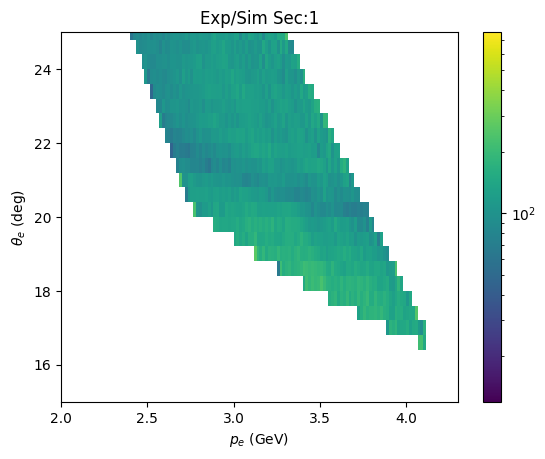

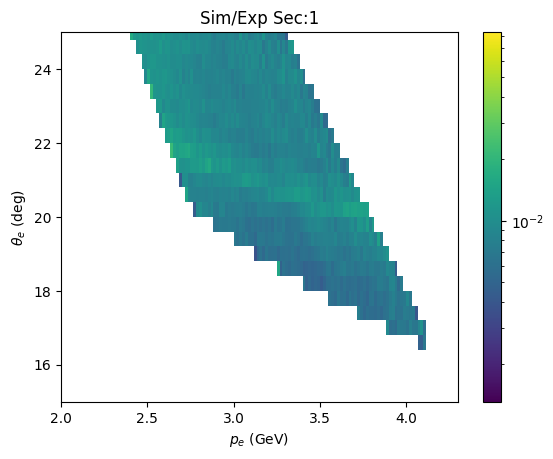

In [17]:
#Sector 1 Cuts
sec = 0

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

In [18]:
#Sector 1
sec = 0
xmerge1 = 4
ymerge1 = 1

x1 = Merge_Bins(xbins,xmerge1)
y1 = Merge_Bins(ybins,ymerge1)

xedges1 = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge1)
yedges1 = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge1)
xrs_z_xy1=Merge_Z(xrs_z_xy[sec],xmerge1,ymerge1) 
rxs_z_xy1=Merge_Z(rxs_z_xy[sec],xmerge1,ymerge1) 
xrs_z_yx1=Merge_Z(xrs_z_yx[sec],ymerge1,xmerge1) 
rxs_z_yx1=Merge_Z(rxs_z_yx[sec],ymerge1,xmerge1) 

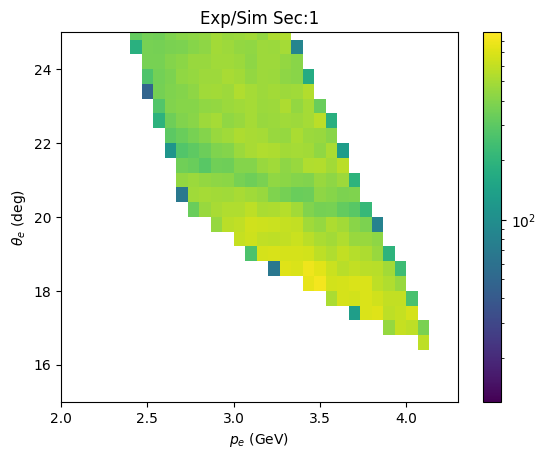

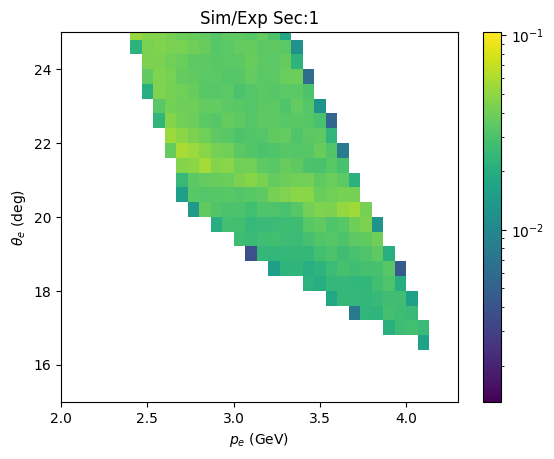

In [19]:
sec = 0

plt.pcolormesh(x1,y1,xrs_z_yx1,norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx1.max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

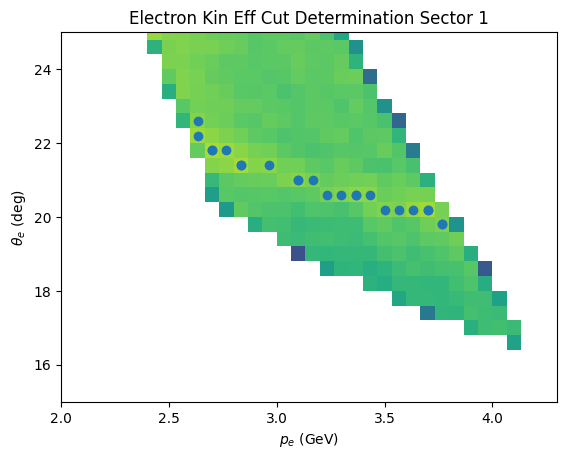

In [20]:
#just one set of cuts needed for sector 1
f1x = []
f1y = []

for xbin in range(len(x1)):
    if x1[xbin] > 2.5 and x1[xbin] < 3.8:
        for ybin in range(len(y1)):
            if y1[ybin] > 19 and y1[ybin] < 23:
                if rxs_z_yx1[ybin][xbin] == rxs_z_yx1[ybin].max():
                    f1x.append(x1[xbin])
                    f1y.append(y1[ybin])
                if rxs_z_xy1[xbin][ybin] == rxs_z_xy1[xbin].max():
                    f1x.append(x1[xbin])
                    f1y.append(y1[ybin])
plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
plt.scatter(f1x,f1y)
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 1")
plt.show()


In [21]:
[[f1x[i],f1y[i]] for i in range(len(f1x))]




[[2.6333333333333333, 22.200000000000003],
 [2.6333333333333333, 22.6],
 [2.6999999999999997, 21.8],
 [2.6999999999999997, 21.8],
 [2.7666666666666666, 21.8],
 [2.833333333333333, 21.400000000000002],
 [2.833333333333333, 21.400000000000002],
 [2.966666666666667, 21.400000000000002],
 [3.1, 21.0],
 [3.1, 21.0],
 [3.1666666666666665, 21.0],
 [3.2333333333333334, 20.6],
 [3.3, 20.6],
 [3.3666666666666663, 20.6],
 [3.3666666666666663, 20.6],
 [3.4333333333333327, 20.6],
 [3.5, 20.200000000000003],
 [3.566666666666667, 20.200000000000003],
 [3.6333333333333333, 20.200000000000003],
 [3.6999999999999997, 20.200000000000003],
 [3.6999999999999997, 20.200000000000003],
 [3.7666666666666666, 19.8],
 [3.7666666666666666, 19.8]]

/var/folders/9h/zwsh0vf94zxdp3tw1qp_dcjw0000gn/T/ipykernel_75657/1347441615.py:8: RuntimeWarning: invalid value encountered in log
  out = c_ + a_*np.log(x_-b_)


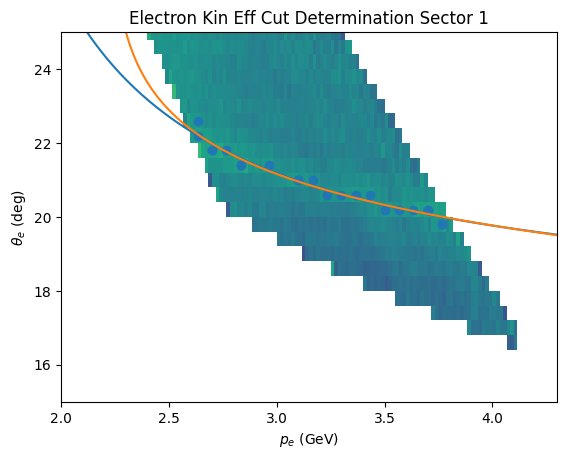

In [22]:
def fit_func1(x_,a_,b_,c_):
    return c_ + a_/(x_-b_)

def fit_func2(x_,a_,b_,c_):
    out = 0.0
    #print(x_ - b_)
    try:
        out = c_ + a_*np.log(x_-b_)
    except RuntimeWarning:
        out = c_
    return out
def fit_func2_mod(x_,a_,b_,c_):
    out = []
    for i in range(len(x_)):
        out.append(fit_func2(x_[i],a_,b_,c_))
    return out

def Linear(x_, a_, b_):
    return a_ + b_*x_

p01_f1 = [13.69,0.13,16.38]
p01_f2 = [-3.06,0.08,24.66]

pars1_f1, pars_cov1_f1 = op.curve_fit(fit_func1,f1x,f1y,p0=p01_f1)
pars1_f2, pars_cov1_f2 = op.curve_fit(fit_func2_mod,f1x,f1y,p0=p01_f2)
cont_x = np.linspace(2,4.3,200)
#plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=0
plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.plot(cont_x,fit_func1(cont_x,*pars1_f1))
plt.plot(cont_x,fit_func2(cont_x,*pars1_f2))
plt.scatter(f1x,f1y)

plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 1")
plt.show()

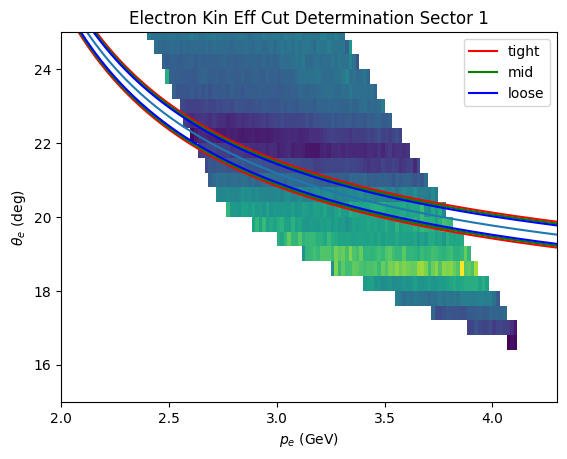

[ 7.08977941  1.20833878 17.22678187]


In [47]:
def Gaus_Shift(xarray_,yarray_,sig_,nsig_,side_):
    out = []
    for i in range(len(xarray_)):
        out.append(yarray_[i]+side_*nsig_*sig_)
    return out

sig = 0.1

cols = ['r','g','b']
cut_name = ['tight',"mid","loose"]
side_val = [-1,1]
cut_width = [3.5,3,2.5]

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.plot(cont_x,fit_func1(cont_x,*pars1_f1))
for cut in range(3):
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func1(cont_x,*pars1_f1),sig,cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func1(cont_x,*pars1_f1),sig,cut_width[cut],1),color=cols[cut])
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 1")
plt.legend()
plt.show()

print(pars1_f1)

/var/folders/9h/zwsh0vf94zxdp3tw1qp_dcjw0000gn/T/ipykernel_75657/1347441615.py:8: RuntimeWarning: invalid value encountered in log
  out = c_ + a_*np.log(x_-b_)


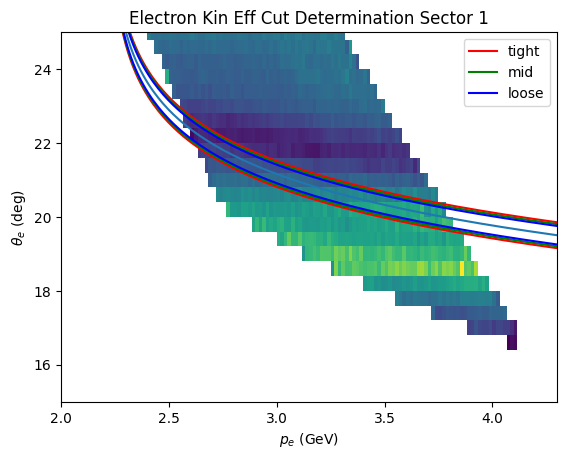

[-1.68934866  2.22046845 20.74202917]


In [48]:
sig = 0.1

cols = ['r','g','b']
cut_name = ['tight',"mid","loose"]
side_val = [-1,1]
cut_width = [3.5,3,2.5]

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.plot(cont_x,fit_func2(cont_x,*pars1_f2))
for cut in range(3):
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars1_f2),sig,cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars1_f2),sig,cut_width[cut],1),color=cols[cut])
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 1")
plt.legend()
plt.show()

print(pars1_f2)

In [25]:
def Integrate(zvals_):
    output = 0.0
    for bin1 in range(len(zvals_)):
        for bin2 in range(len(zvals_[0])):
            output += zvals_[bin1][bin2]
    return output

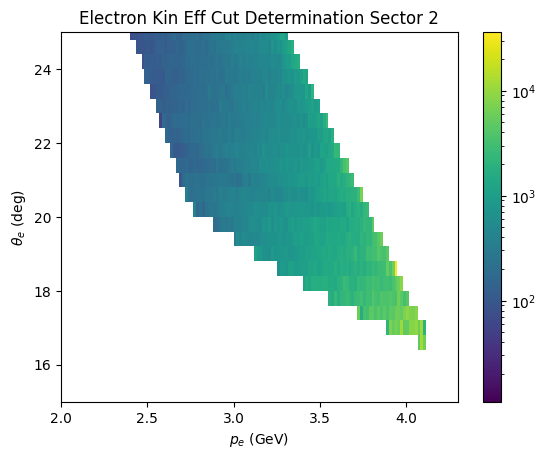

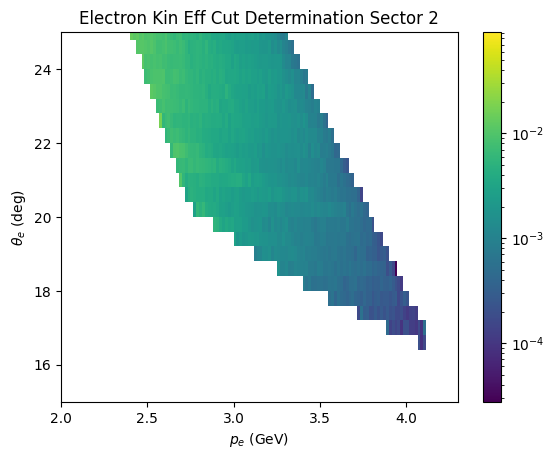

In [26]:
#Sector 2 Cuts
sec = 1

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.colorbar()
plt.show()

In [27]:
# Bounds_on_Y(yarray_,low_,high_) removes all values not between or equal to bounds
# Bounds_on_X_From_Y(xarray_,yarray_,low_,high_) removes all xbins where corresponding y values are not between bounds
# Merge_Z(zvals_,var1_merge_size_,var2_merge_size) merges z values for 2D histograms with specific dim merge sizes
# Bounds_on_Z_XY(zvals_,xvals_,yvals_,xlow_,xtop_,ylow_,ytop_): sets bounds on z values given x and y bound values
# Bounds_on_Z_YX(zvals_,xvals_,yvals_,xlow_,xtop_,ylow_,ytop_): sets bounds on z values given y and x bound values


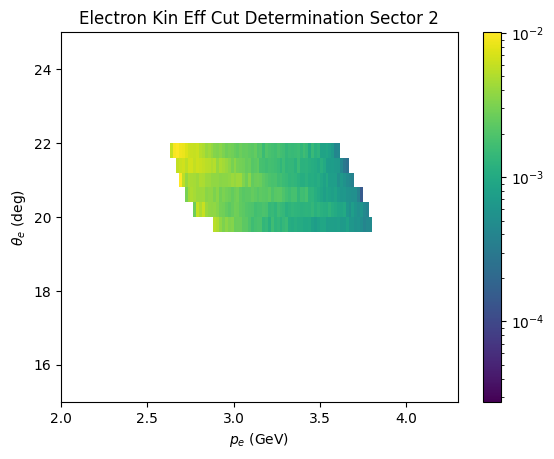

In [28]:
sec=1
xbou2 = [2.5,3.8]
ybou2 = [19.5,22]
x2 = Bounds_on_Y(x,xbou2[0],xbou2[1])
y2 = Bounds_on_Y(y,ybou2[0],ybou2[1])
z_xy2 = Bounds_on_Z_XY(rxs_z_xy[sec],x,y,xbou2[0],xbou2[1],ybou2[0],ybou2[1])
z_yx2 = Bounds_on_Z_YX(rxs_z_yx[sec],x,y,xbou2[0],xbou2[1],ybou2[0],ybou2[1])


plt.pcolormesh(x2,y2,z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=z_yx2.max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.colorbar()
plt.show()

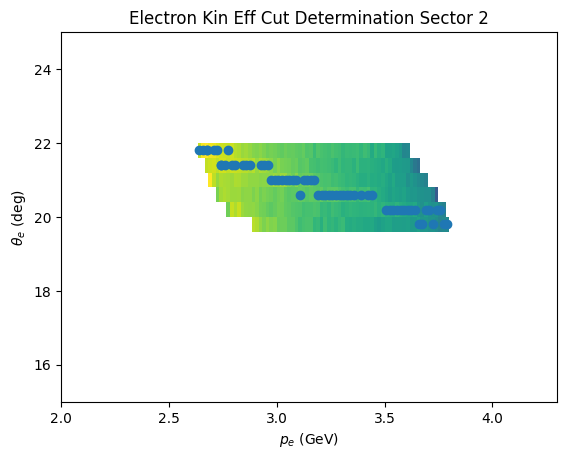

In [29]:
#just one set of cuts needed for sector 2
f2x = []
f2y = []

for xbin in range(len(x2)):
    for ybin in range(len(y2)):
        if y2[ybin] > Linear(x2[xbin],26,-1.84) and y2[ybin] < Linear(x2[xbin],27.5,-1.84):
            if z_xy2[xbin][ybin] == z_xy2[xbin].max() and z_xy2[xbin][ybin]>0.0:
                f2x.append(x2[xbin])
                f2y.append(y2[ybin])
            if z_yx2[ybin][xbin] == z_yx2[ybin].max() and z_yx2[ybin][xbin]>0.0:
                f2x.append(x2[xbin])
                f2y.append(y2[ybin])
plt.pcolormesh(x2,y2,z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=z_yx2.max()))
#plt.plot(cont_x,Linear(cont_x,26,-1.84))
#plt.plot(cont_x,Linear(cont_x,27.5,-1.84))
plt.scatter(f2x,f2y)
plt.xlim((2.0,4.3))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.ylim((15,25))
plt.show()


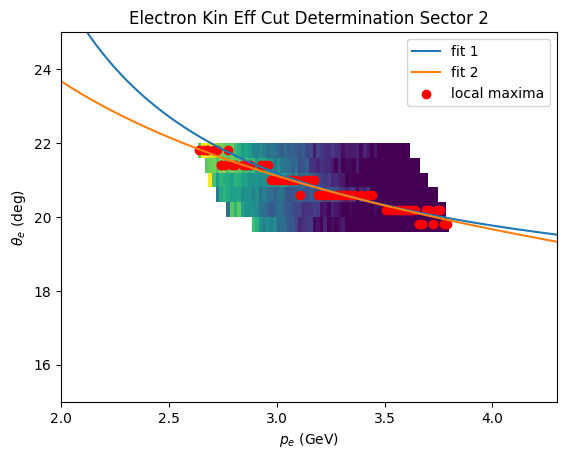

In [30]:
p02_f1 = [13.69,0.13,16.38]
p02_f2 = [-3.06,0.08,24.66]

pars2_f1, pars_cov1_f1 = op.curve_fit(fit_func1,f1x,f1y,p0=p01_f1)
pars2_f2, pars_cov2_f2 = op.curve_fit(fit_func2_mod,f2x,f2y,p0=p02_f2)
cont_x = np.linspace(2,4.3,200)
#plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=0
plt.pcolormesh(x2,y2,z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=z_yx2.max()))
plt.plot(cont_x,fit_func1(cont_x,*pars2_f1),label='fit 1')
plt.plot(cont_x,fit_func2(cont_x,*pars2_f2),label='fit 2')
plt.scatter(f2x,f2y,color='r',label='local maxima')
plt.legend()
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.show()

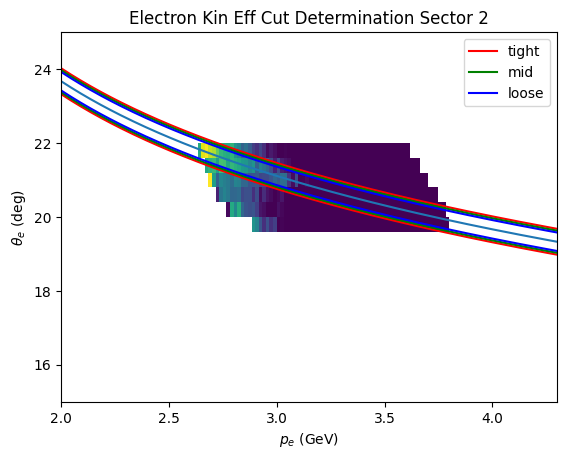

[-3.40309844  1.11018357 23.27605359]


In [49]:
sig = 0.1


plt.pcolormesh(x2,y2,z_yx2,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=z_yx2.max()))
plt.plot(cont_x,fit_func2(cont_x,*pars2_f2))
for cut in range(3):
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars2_f2),sig,cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
    plt.plot(cont_x,Gaus_Shift(cont_x,fit_func2(cont_x,*pars2_f2),sig,cut_width[cut],1),color=cols[cut])
plt.xlim((2.0,4.3))
plt.ylim((15,25))
plt.legend()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 2")
plt.show()
print(pars2_f2)

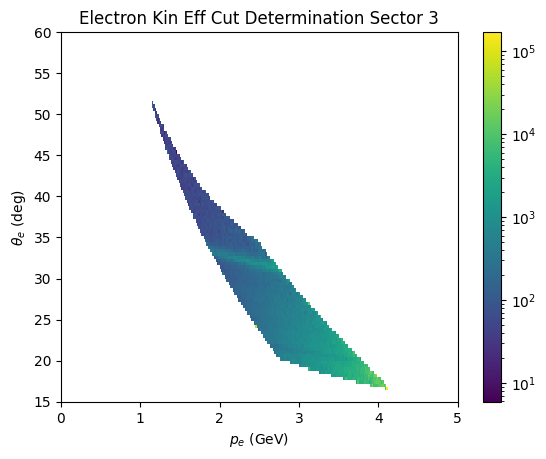

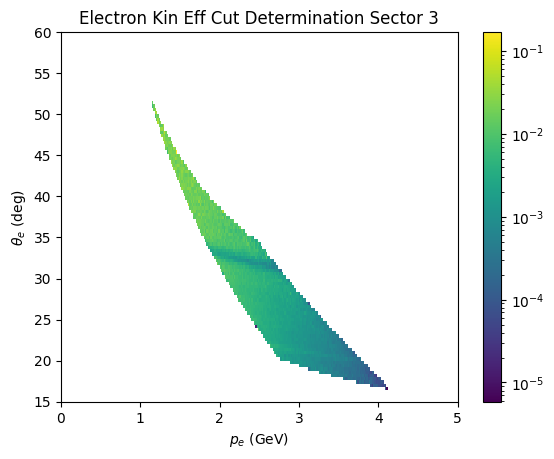

In [32]:
#Sector 3 Cuts
sec = 2

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 3")
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.title("Electron Kin Eff Cut Determination Sector 3")
plt.show()

49.8454610679763


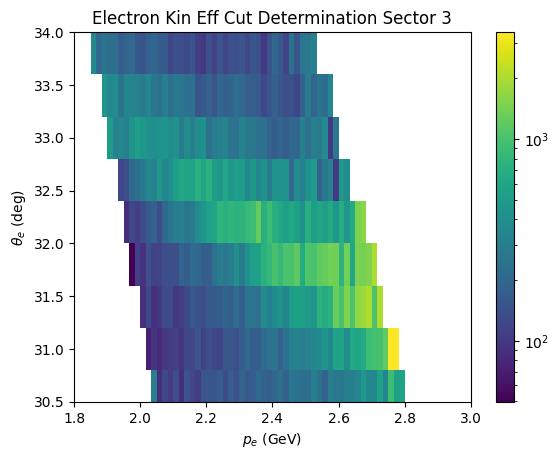

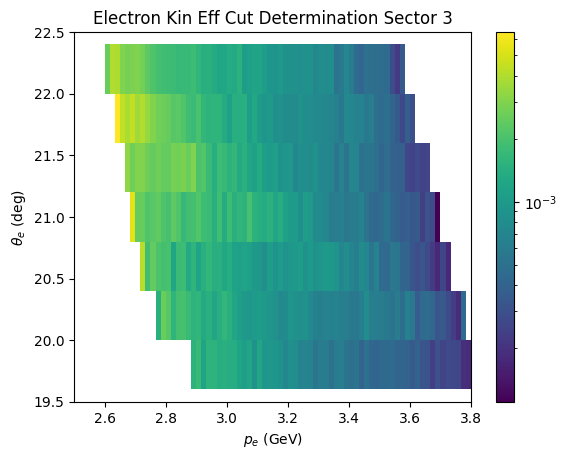

In [33]:
#Need two cuts
sec=2
xbou3 = [[1.8,3],[2.5,3.8]]
ybou3 = [[30.5,34],[19.5,22.5]]
x3 = [Bounds_on_Y(x,xbou3[0][0],xbou3[0][1]),Bounds_on_Y(x,xbou3[1][0],xbou3[1][1])]
y3 = [Bounds_on_Y(y,ybou3[0][0],ybou3[0][1]),Bounds_on_Y(y,ybou3[1][0],ybou3[1][1])]
z_xy3 = [Bounds_on_Z_XY(xrs_z_xy[sec],x,y,xbou3[0][0],xbou3[0][1],ybou3[0][0],ybou3[0][1]),Bounds_on_Z_XY(rxs_z_xy[sec],x,y,xbou3[1][0],xbou3[1][1],ybou3[1][0],ybou3[1][1])]
z_yx3 = [Bounds_on_Z_YX(xrs_z_yx[sec],x,y,xbou3[0][0],xbou3[0][1],ybou3[0][0],ybou3[0][1]),Bounds_on_Z_YX(rxs_z_yx[sec],x,y,xbou3[1][0],xbou3[1][1],ybou3[1][0],ybou3[1][1])]


print(min_z(z_yx3[0]))

for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.title("Sim/Exp Sec:{}".format(sec+1))
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.colorbar()
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Electron Kin Eff Cut Determination Sector 3")
    plt.show()

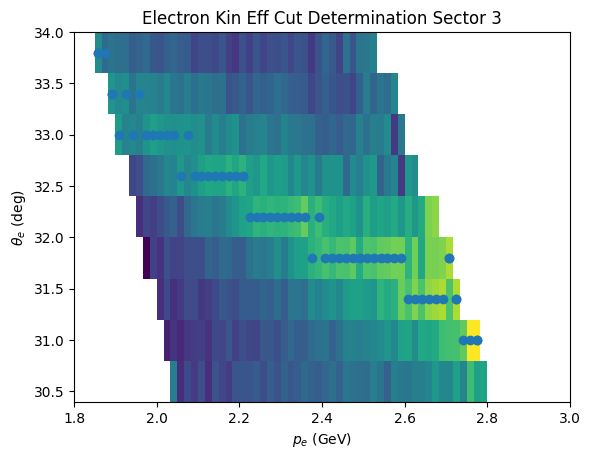

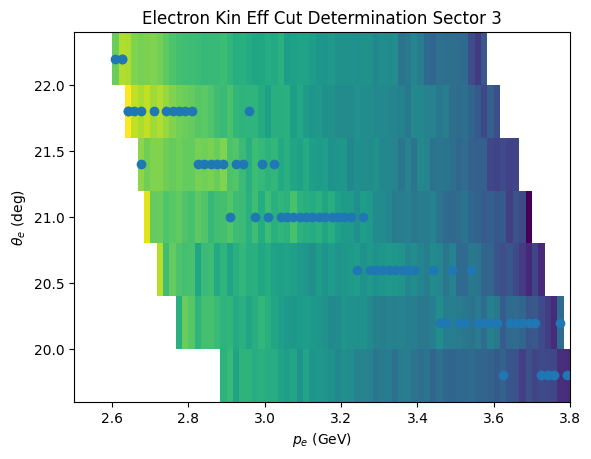

In [34]:
#just one set of cuts needed for sector 2
f3x = [[],[]]
f3y = [[],[]]

slice_pars  = [[[36,-1.84],[38.6,-2.5]],[[26,-1.84],[27.5,-1.84]]]


for s in range(2):
    for xbin in range(len(x3[s])):
        for ybin in range(len(y3[s])):
            if y3[s][ybin] > Linear(x3[s][xbin],slice_pars[s][0][0],slice_pars[s][0][1]) and y3[s][ybin] < Linear(x3[s][xbin],slice_pars[s][1][0],slice_pars[s][1][1]):
                if z_xy3[s][xbin][ybin] == z_xy3[s][xbin].max() and z_xy3[s][xbin][ybin]>0.0:
                    f3x[s].append(x3[s][xbin])
                    f3y[s].append(y3[s][ybin])
                if z_yx3[s][ybin][xbin] == z_yx3[s][ybin].max() and z_yx3[s][ybin][xbin]>0.0:
                    f3x[s].append(x3[s][xbin])
                    f3y[s].append(y3[s][ybin])
for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    #plt.plot(cont_x,Linear(cont_x,slice_pars[i][0][0],slice_pars[i][0][1]))
    #plt.plot(cont_x,Linear(cont_x,slice_pars[i][1][0],slice_pars[i][1][1]))
    
    #plt.plot(cont_x,Linear(cont_x,26,-1.84))
    #plt.plot(cont_x,Linear(cont_x,27.5,-1.84))
    plt.scatter(f3x[i],f3y[i])
    #plt.xlim((2.0,4.3))
    #plt.ylim((15,25))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Electron Kin Eff Cut Determination Sector 3")
    plt.show()

/var/folders/9h/zwsh0vf94zxdp3tw1qp_dcjw0000gn/T/ipykernel_75657/1347441615.py:8: RuntimeWarning: invalid value encountered in log
  out = c_ + a_*np.log(x_-b_)


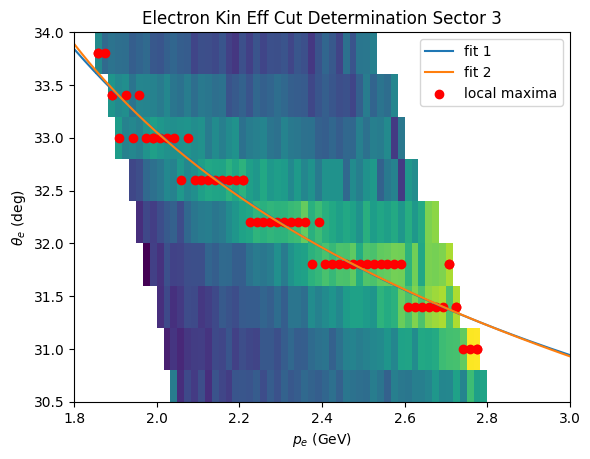

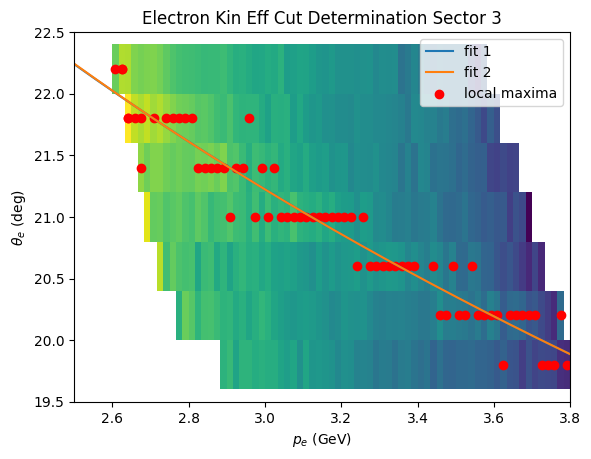

In [35]:
p03_f1 = [[13.69,0.13,16.38],[13.69,0.13,16.38]]
p03_f2 = [[-3.06,0.08,24.66],[-3.06,0.08,24.66]]

pars30_f1, pars_cov30_f1 = op.curve_fit(fit_func1,f3x[0],f3y[0],p0=p03_f1[0])
pars30_f2, pars_cov30_f2 = op.curve_fit(fit_func2_mod,f3x[0],f3y[0],p0=p03_f2[0])
pars31_f1, pars_cov31_f1 = op.curve_fit(fit_func1,f3x[1],f3y[1],p0=p03_f1[1])
pars31_f2, pars_cov31_f2 = op.curve_fit(fit_func2_mod,f3x[1],f3y[1],p0=p03_f2[1])

pars3_f1 = [pars30_f1,pars31_f1]
pars3_f2 = [pars30_f2,pars31_f2]
cont_x3 = [np.linspace(xbou3[0][0],xbou3[0][1],200),np.linspace(xbou3[1][0],xbou3[1][1],200)]
#plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=2
for i in range(2):
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x3[i],fit_func1(cont_x3[i],*pars3_f1[i]),label='fit 1')
    plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),label='fit 2')
    plt.scatter(f3x[i],f3y[i],color='r',label="local maxima")
    plt.legend()
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Electron Kin Eff Cut Determination Sector 3")
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.show()

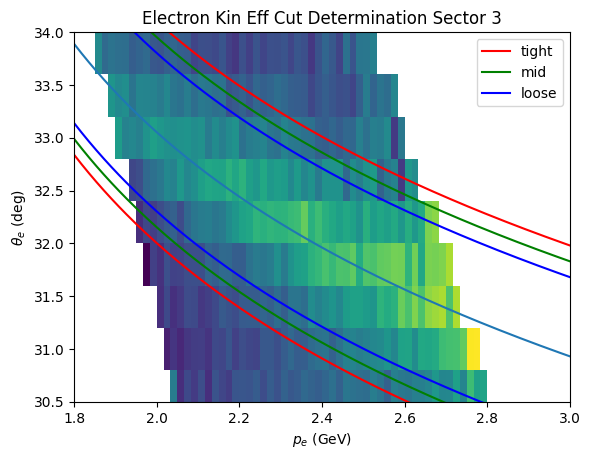

[-2.28235273  1.34864155 32.07404169]


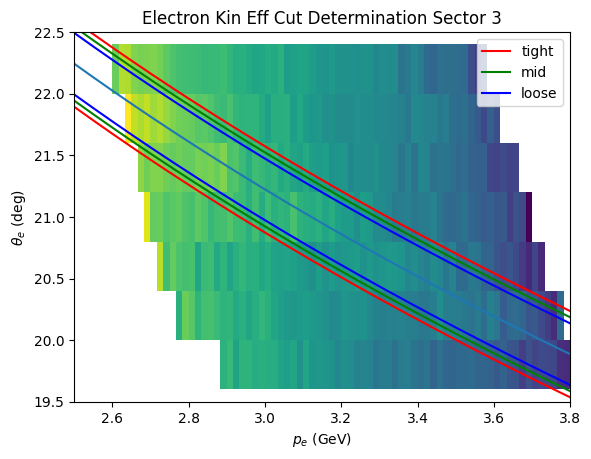

[-5.95026665 -0.1731265  28.09454828]


In [51]:
sig3 = [0.3,0.1]

for i in range(2):
#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]))
    for cut in range(3):
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((xbou3[i][0],xbou3[i][1]))
    plt.ylim((ybou3[i][0],ybou3[i][1]))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Electron Kin Eff Cut Determination Sector 3")
    plt.show()
    print(pars3_f2[i])

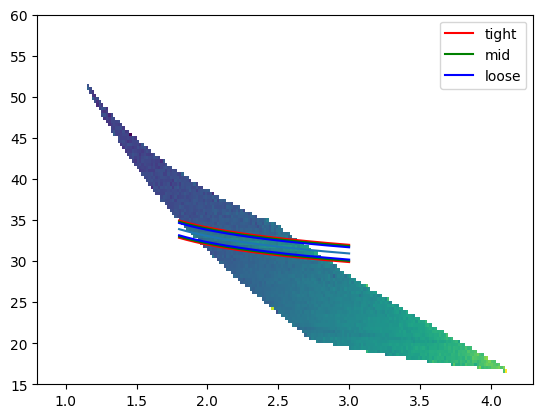

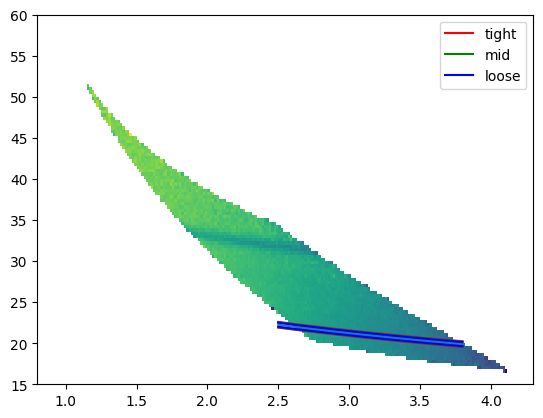

In [37]:
for i in range(2):
    if i ==0:
        plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
    else:
        plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #plt.pcolormesh(x3[i],y3[i],z_yx3[i],norm=colors.LogNorm(vmin=min_z(z_yx3[i]),vmax=z_yx3[i].max()))
    plt.plot(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]))
    for cut in range(3):
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x3[i],Gaus_Shift(cont_x3[i],fit_func2(cont_x3[i],*pars3_f2[i]),sig3[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((0.8,4.3))
    plt.ylim((15,60))
    plt.show()

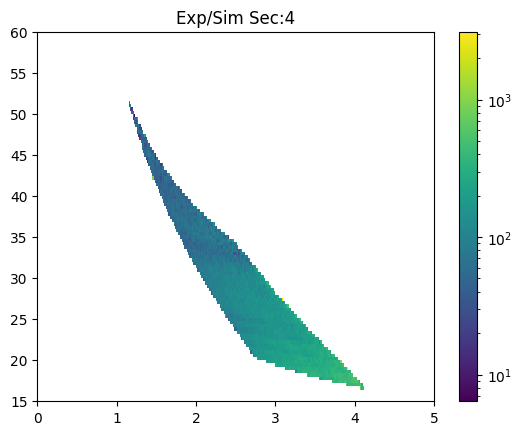

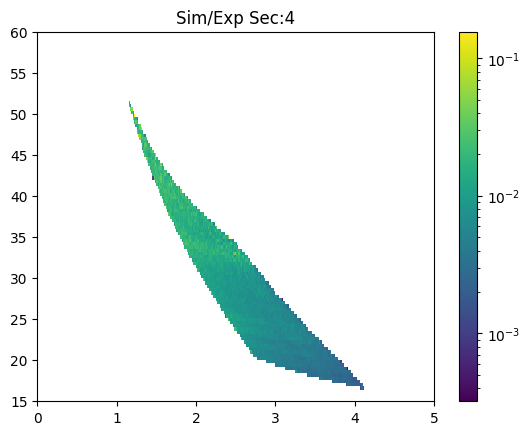

In [38]:
#Sector 4 Cuts
sec = 3

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.show()

In [39]:
#no obvious points of cuts for sector 4

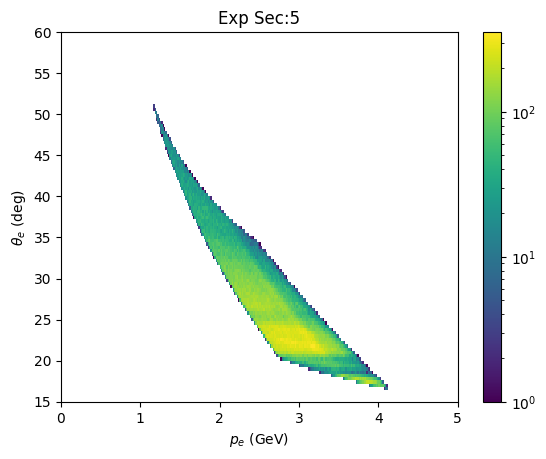

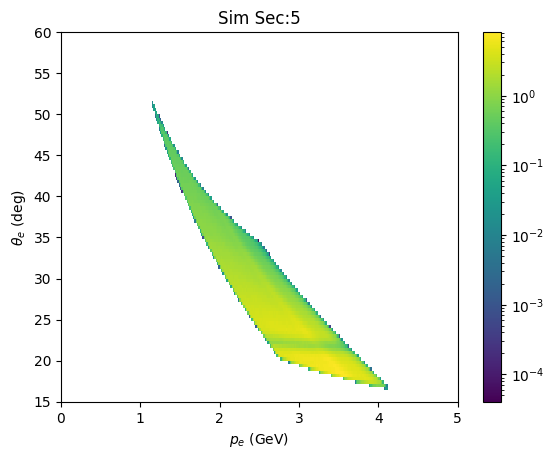

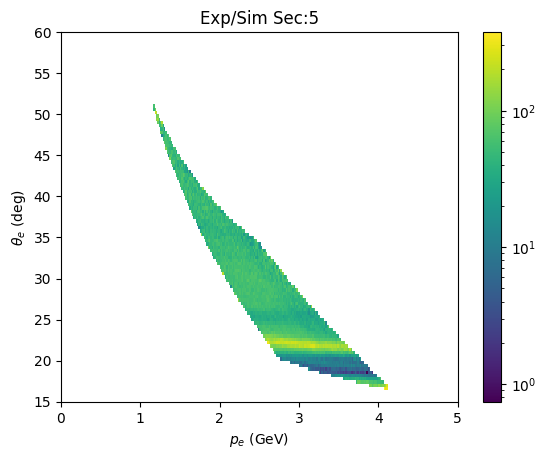

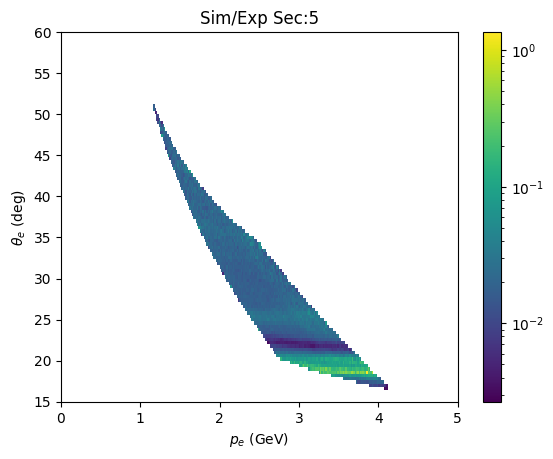

In [40]:
#Sector 5 Cuts
sec = 4

plt.pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xs_z_yx[sec]),vmax=xs_z_yx[sec].max()))
plt.title("Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rs_z_yx[sec]),vmax=rs_z_yx[sec].max()))
plt.title("Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

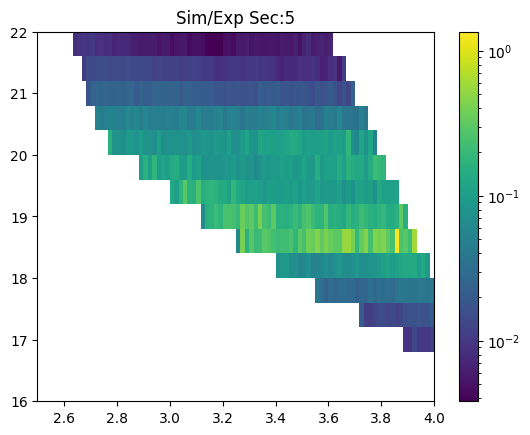

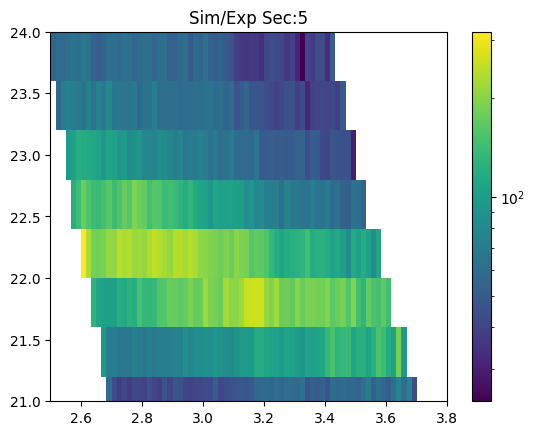

In [41]:
#Need two cuts
sec=4
xbou5 = [[2.5,4.0],[2.5,3.8]]
ybou5 = [[16,22],[21,24]]
x5 = [Bounds_on_Y(x,xbou5[0][0],xbou5[0][1]),Bounds_on_Y(x,xbou5[1][0],xbou5[1][1])]
y5 = [Bounds_on_Y(y,ybou5[0][0],ybou5[0][1]),Bounds_on_Y(y,ybou5[1][0],ybou5[1][1])]
z_xy5 = [Bounds_on_Z_XY(rxs_z_xy[sec],x,y,xbou5[0][0],xbou5[0][1],ybou5[0][0],ybou5[0][1]),Bounds_on_Z_XY(xrs_z_xy[sec],x,y,xbou5[1][0],xbou3[1][1],ybou5[1][0],ybou5[1][1])]
z_yx5 = [Bounds_on_Z_YX(rxs_z_yx[sec],x,y,xbou5[0][0],xbou5[0][1],ybou5[0][0],ybou5[0][1]),Bounds_on_Z_YX(xrs_z_yx[sec],x,y,xbou5[1][0],xbou3[1][1],ybou5[1][0],ybou5[1][1])]


for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.title("Sim/Exp Sec:{}".format(sec+1))
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.colorbar()
    plt.show()

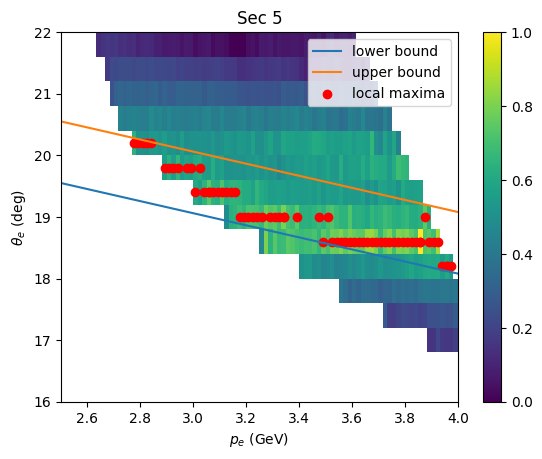

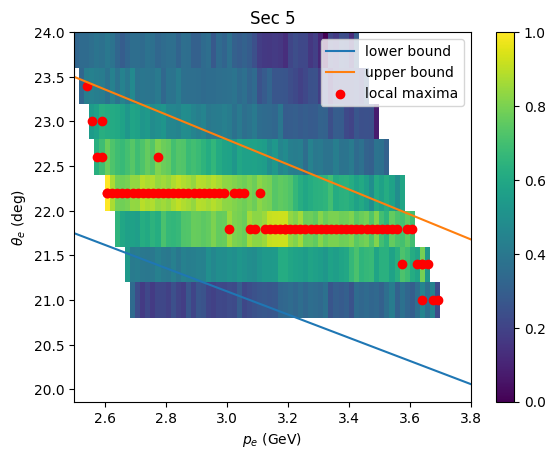

In [42]:

f5x = [[],[]]
f5y = [[],[]]

slice_pars  = [[[22,-0.98],[23,-0.98]],[[25,-1.3],[27,-1.4]]]
cont_x5 = [np.linspace(xbou5[0][0],xbou5[0][1],200),np.linspace(xbou5[1][0],xbou5[1][1],200)]

for s in range(2):
    for xbin in range(len(x5[s])):
        for ybin in range(len(y5[s])):
            if y5[s][ybin] > Linear(x5[s][xbin],slice_pars[s][0][0],slice_pars[s][0][1]) and y5[s][ybin] < Linear(x5[s][xbin],slice_pars[s][1][0],slice_pars[s][1][1]):
                if z_xy5[s][xbin][ybin] == z_xy5[s][xbin].max() and z_xy5[s][xbin][ybin]>0.0:
                    f5x[s].append(x5[s][xbin])
                    f5y[s].append(y5[s][ybin])
                if z_yx5[s][ybin][xbin] == z_yx5[s][ybin].max() and z_yx5[s][ybin][xbin]>0.0:
                    f5x[s].append(x5[s][xbin])
                    f5y[s].append(y5[s][ybin])
for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.plot(cont_x5[i],Linear(cont_x5[i],slice_pars[i][0][0],slice_pars[i][0][1]),label='lower bound')
    plt.plot(cont_x5[i],Linear(cont_x5[i],slice_pars[i][1][0],slice_pars[i][1][1]),label='upper bound')
    
    #plt.plot(cont_x,Linear(cont_x,26,-1.84))
    #plt.plot(cont_x,Linear(cont_x,27.5,-1.84))
    plt.scatter(f5x[i],f5y[i],color='r',label="local maxima")
    #plt.xlim((2.0,4.3))
    #plt.ylim((15,25))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Sec 5")
    plt.legend()
    plt.colorbar()
    plt.show()
    
# for i in range(2):
#     for j in range(len(f5x[i])):
#         if j==0:
#             print("{{",f5x[i][j],",",f5y[i][j],"},")
#         elif j==len(f5x[i])-1:
#             print("{",f5x[i][j],",",f5y[i][j],"}}")
#         else:
#             print("{",f5x[i][j],",",f5y[i][j],"},")

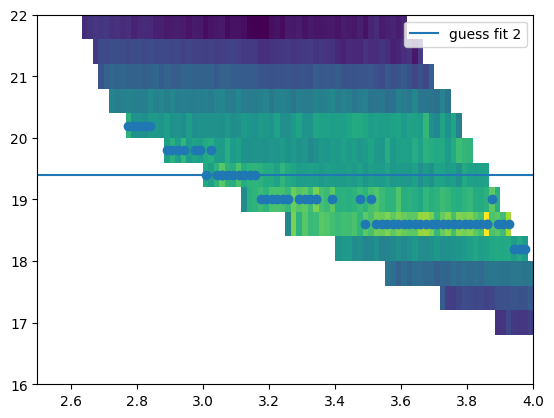

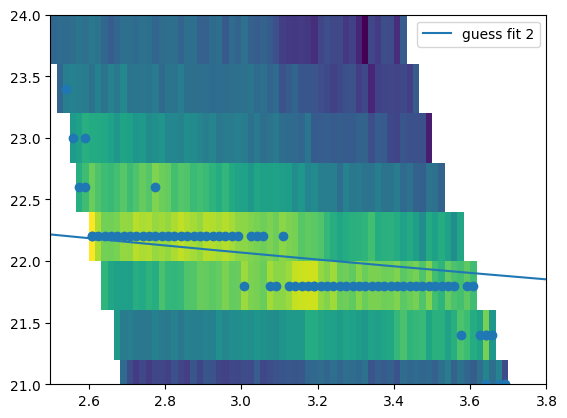

In [43]:
p05_f1 = [[15.69,-0.776,15.69],[15.73,-6.59,20.69]]
#p05_f2 = [[-1.98,0.262,21.5],[-2.29,-5.032,26.84]]

p05_f2 = [[0.0,0.0,19.4],[-2.29,-5.032,26.84]]

# #pars50_f1, pars_cov30_f1 = op.curve_fit(fit_func1,f5x[0],f5y[0],p0=p05_f1[0],maxfev=1000)
#pars50_f2, pars_cov30_f2 = op.curve_fit(fit_func2_mod,f5x[0],f5y[0],p0=p05_f2[0],maxfev=10000)
# #pars51_f1, pars_cov31_f1 = op.curve_fit(fit_func1,f5x[1],f5y[1],p0=p05_f1[1],maxfev=1000)
#pars51_f2, pars_cov31_f2 = op.curve_fit(fit_func2_mod,f5x[1],f5y[1],p0=p05_f2[1],maxfev=10000)

# #pars5_f1 = [pars50_f1,pars51_f1]
#pars5_f2 = [pars50_f2,pars51_f2]
cont_x5 = [np.linspace(xbou5[0][0],xbou5[0][1],200),np.linspace(xbou5[1][0],xbou5[1][1],200)]
#plt.pcolormesh(x1,y1,rxs_z_yx1,norm=colors.LogNorm(vmin=min_z_rxs[sec],vmax=rxs_z_yx1.max()))
sec=2
for i in range(2):
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    #plt.plot(cont_x5[i],fit_func1(cont_x5[i],*pars5_f1[i]),label='fit 1')
    #plt.plot(cont_x5[i],fit_func2(cont_x5[i],*pars5_f2[i]),label='fit 2')
    
    #plt.plot(cont_x5[i],fit_func1(cont_x5[i],*p05_f1[i]),label='fit 1')
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='guess fit 2')
    plt.scatter(f5x[i],f5y[i])
    plt.legend()
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.show()

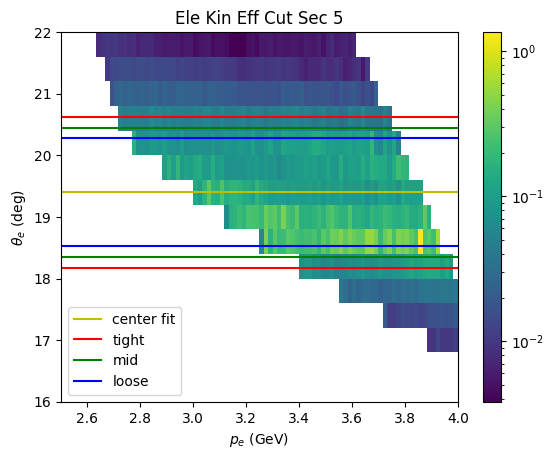

[0.0, 0.0, 19.4]


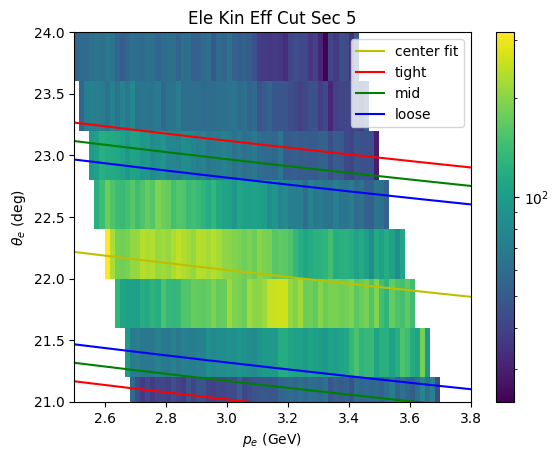

[-2.29, -5.032, 26.84]


In [52]:
sig5 = [0.35,0.3]


def Gaus_Shift2(xarray_,yarray_,sig_,nsig_,side_):
    #print(side_)
    out = []
    for i in range(len(xarray_)):
        #print(side_*nsig_*sig_,yarray_[i],yarray_[i]+side_*nsig_*sig_)
        out.append(yarray_[i]+side_*nsig_*sig_)
    return out


for i in range(2):
#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
    for cut in range(3):
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((xbou5[i][0],xbou5[i][1]))
    plt.ylim((ybou5[i][0],ybou5[i][1]))
    plt.xlabel("{} (GeV)".format(Momentum))
    plt.ylabel("{} (deg)".format(Theta))
    plt.title("Ele Kin Eff Cut Sec 5")
    plt.colorbar()
    plt.show()
    print(p05_f2[i])
    
# for i in range(2):
#     for j in range(len(cont_x5[i])):
#         print(fit_func2(cont_x5[i],*p05_f2[i])[j]-Gaus_Shift2(cont_x5[i],fit_func2(cont_x3[i],*p05_f2[i]),sig5[i],cut_width[cut],-1)[j],fit_func2(cont_x5[i],*p05_f2[i])[j],Gaus_Shift2(cont_x5[i],fit_func2(cont_x3[i],*p05_f2[i]),sig5[i],cut_width[cut],1)[j]-fit_func2(cont_x5[i],*p05_f2[i])[j])
        
        

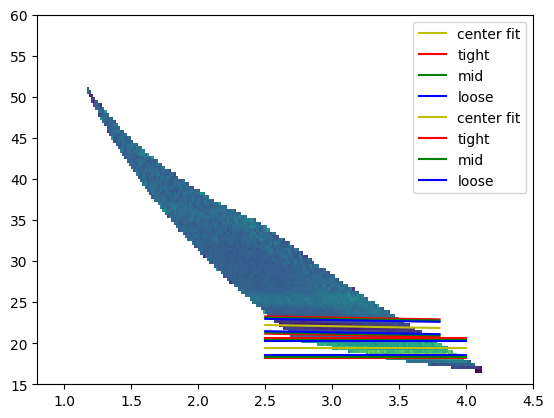

In [45]:
sec = 4


#     if i ==0:
#         plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z_xrs[sec],vmax=xrs_z_yx[sec].max()))
#     else:
#         plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #plt.pcolormesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
    #rmesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
for i in range(2):
    plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
    for cut in range(3):
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
        plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
    plt.legend()
    plt.xlim((0.8,4.5))
    plt.ylim((15,60))
    
plt.show()

NameError: name 'rmesh' is not defined

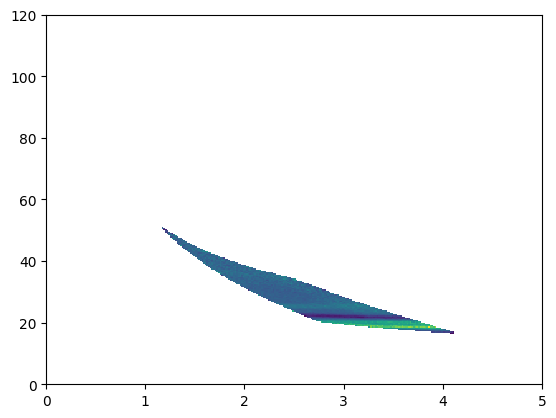

In [46]:
sec=4
i=1

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
rmesh(x5[i],y5[i],z_yx5[i],norm=colors.LogNorm(vmin=min_z(z_yx5[i]),vmax=z_yx5[i].max()))
plt.plot(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),label='center fit',color='y')
for cut in range(3):
    plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],-1),label="{}".format(cut_name[cut]),color=cols[cut])
    plt.plot(cont_x5[i],Gaus_Shift2(cont_x5[i],fit_func2(cont_x5[i],*p05_f2[i]),sig5[i],cut_width[cut],1),color=cols[cut])
plt.legend()
plt.xlim((0.8,4.5))
plt.ylim((15,60))
plt.show()



In [ ]:
#Sector 6 Cuts
sec = 5

plt.pcolormesh(x,y,xs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xs_z_yx[sec]),vmax=xs_z_yx[sec].max()))
plt.title("Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,rs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rs_z_yx[sec]),vmax=rs_z_yx[sec].max()))
plt.title("Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,xrs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(xrs_z_yx[sec]),vmax=xrs_z_yx[sec].max()))
plt.title("Exp/Sim Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.colorbar()
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.show()

plt.pcolormesh(x,y,rxs_z_yx[sec],norm=colors.LogNorm(vmin=min_z(rxs_z_yx[sec]),vmax=rxs_z_yx[sec].max()))
plt.title("Sim/Exp Sec:{}".format(sec+1))
#plt.xlim((2.0,4.3))
plt.ylim((15,60))
plt.xlabel("{} (GeV)".format(Momentum))
plt.ylabel("{} (deg)".format(Theta))
plt.colorbar()
plt.show()

In [ ]:
#not seeing anything worth cutting


In [342]:
print("Perform E16 Electron Kinematic Efficiency Cuts")
print("[sec]")
print("{true,true,true,false,true,false}")

Perform E16 Electron Kinematic Efficiency Cuts
[sec]
{true,true,true,false,true,false}


In [ ]:
print("E16 Electron Kinematic Efficiency parameters")
print("sec1")
